In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error 

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [34]:
data = pd.read_csv('insurance.csv')

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis

### Distribution Graph of BMI

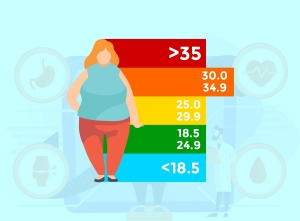

In [38]:
bmi = pd.cut(x=data['bmi'],
             bins=[15, 18, 25, 30, 35, 55]).value_counts().sort_index()

print(bmi)

(15, 18]     15
(18, 25]    232
(25, 30]    386
(30, 35]    389
(35, 55]    316
Name: bmi, dtype: int64


In [39]:
charges_by_bmi = data[['bmi', 'charges']]

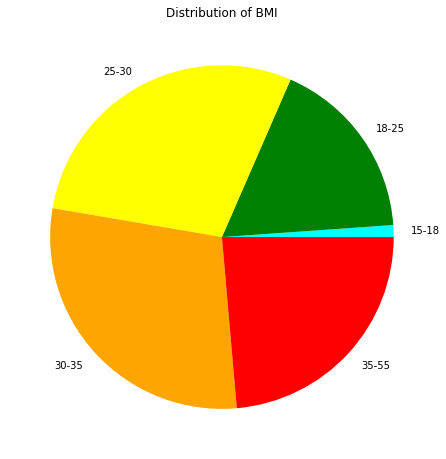

In [40]:
labels = ['15-18','18-25', '25-30', '30-35', '35-55']
plt.figure(figsize=(7.9, 7.9))
plt.pie(bmi, labels = labels, colors=['#00FFFF', 'green', 'yellow', 'orange', 'red'])
plt.title("Distribution of BMI")
plt.show()


As you see pie chart above, BMI values is distributed between 15 and 55  

### Relation Beetween Smoker and Charges

In [41]:
average_smoker = data.groupby(data['smoker'])['charges'].mean()

In [42]:
average_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Text(0.5, 1.0, 'Medical Cost by Smoking Habit')

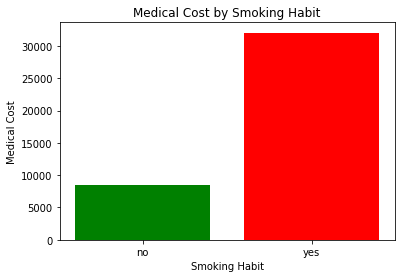

In [43]:
plt.bar(average_smoker.index, average_smoker.values, color=['green', 'red'])
plt.xlabel("Smoking Habit")
plt.ylabel("Medical Cost")
plt.title("Medical Cost by Smoking Habit")

The graph shows us people who smoke face 2.8 times more medical cost.

## En çok “children”’a sahip “region”

In [44]:
northwest_c = data[data.region == "northwest"].children.count()
northeast_c = data[data.region == "northeast"].children.count()
southwest_c = data[data.region == "southwest"].children.count()
southheast_c = data[data.region == "southeast"].children.count()

print(northwest_c, northeast_c, southwest_c, southheast_c)

#En çok “children”’a sahip “region”: Southeast

325 324 325 364


Text(0.5, 1.0, 'Children by Region')

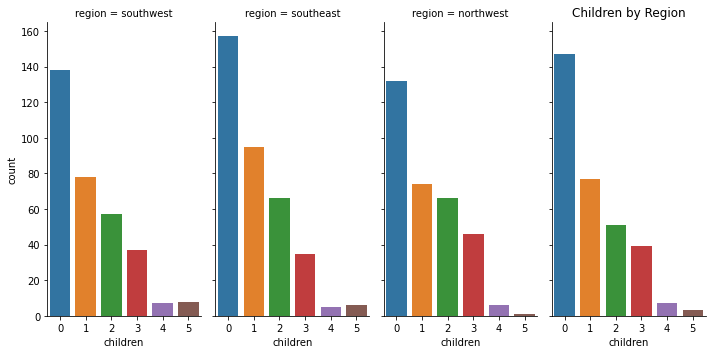

In [45]:
sns.catplot(x = 'children', col = 'region', data = data, kind = 'count', aspect = 0.5)
plt.title('Children by Region')

## “Age” ile “bmi” arasındaki ilişki

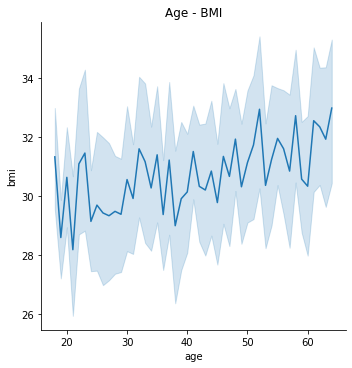

In [46]:
sns.relplot(x = data.age, y = data.bmi, data = data, kind='line') 
plt.title('Age - BMI')
plt.show()

In [47]:
# Yaşlara göre kategoriler:

data.loc[(data['age'] >= 18) & (data['age'] < 36), 'age_category'] = 'youth'
data.loc[(data['age'] >= 36) & (data['age'] <= 55), 'age_category'] = 'adults'
data.loc[data['age'] > 55, 'age_category'] = 'seniors'
data['age_category'].value_counts()

youth      574
adults     548
seniors    216
Name: age_category, dtype: int64

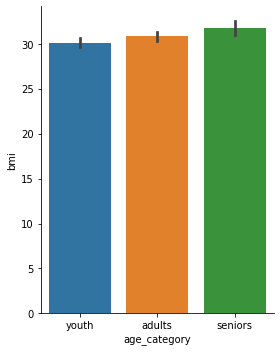

In [48]:
sns.catplot(x = 'age_category', y = 'bmi', data = data, kind = 'bar', aspect = 0.8)

In [49]:
data.loc[data['bmi'] < 18.5, 'weight_condition'] = 'underweight'
data.loc[(data['bmi'] >= 18.5) & (data['bmi'] <= 24.9), 'weight_condition'] = 'normal'
data.loc[(data['bmi'] > 24.9) & (data['bmi'] <= 29.9), 'weight_condition'] = 'overweight'
data.loc[data['bmi'] > 29.9, 'weight_condition'] = 'obese'

data['weight_condition'].value_counts()

obese          716
overweight     380
normal         222
underweight     20
Name: weight_condition, dtype: int64

In [ ]:
#Gençlerin kilo durumu
youth_underweight = data[data.age_category == "youth"][data.weight_condition == "underweight"].weight_condition.count()
youth_normal = data[data.age_category == "youth"][data.weight_condition == "normal"].weight_condition.count()
youth_overweight = data[data.age_category == "youth"][data.weight_condition == "overweight"].weight_condition.count()
youth_obese = data[data.age_category == "youth"][data.weight_condition == "obese"].weight_condition.count()

#Yetişkinlerin kilo durumu
adults_underweight = data[data.age_category == "adults"][data.weight_condition == "underweight"].weight_condition.count()
adults_normal = data[data.age_category == "adults"][data.weight_condition == "normal"].weight_condition.count()
adults_overweight = data[data.age_category == "adults"][data.weight_condition == "overweight"].weight_condition.count()
adults_obese = data[data.age_category == "adults"][data.weight_condition == "obese"].weight_condition.count()

#Yaşlıların kilo durumu
seniors_underweight = data[data.age_category == "seniors"][data.weight_condition == "underweight"].weight_condition.count()
seniors_normal = data[data.age_category == "seniors"][data.weight_condition == "normal"].weight_condition.count()
seniors_overweight = data[data.age_category == "seniors"][data.weight_condition == "overweight"].weight_condition.count()
seniors_obese = data[data.age_category == "seniors"][data.weight_condition == "obese"].weight_condition.count()


#print(youth_underweight, youth_normal, youth_overweight, youth_obese)
#print(adults_underweight, adults_normal, adults_overweight, adults_obese)
#print(seniors_underweight, seniors_normal, seniors_overweight,seniors_obese)

age_weight=pd.DataFrame([[youth_underweight, youth_normal, youth_overweight, youth_obese], 
                         [adults_underweight, adults_normal, adults_overweight, adults_obese],
                         [seniors_underweight, seniors_normal, seniors_overweight, seniors_obese]], columns=['underwight', 'normal', 'overweight', 'obese'], index = ['youth', 'adults', 'seniors'])

In [54]:
age_weight

,underwight,normal,overweight,obese
youth,13,112,161,288
adults,5,85,162,296
seniors,2,25,57,132


Kilolu olanların çoğunluğu genç ve yetişkinler yani 55 yaşından küçük olanlar oluşturuyor diyebiliriz. Zayıf ve normal kiloda olanların çoğunu ise 36 yaşından küçükler oluşturmaktadır. Obez yaşlı sayısı diğerlerine göre daha azdır yorumlarını yapabiliriz.

## “bmi” ile “children” arasındaki ilişki

In [55]:
data.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Text(0.5, 1.0, 'Children - BMI')

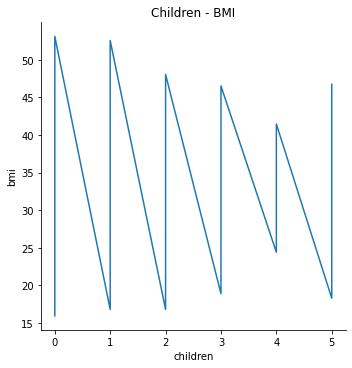

In [57]:
sns.relplot(x="children", y="bmi", kind="line", estimator=None, data=data)
plt.title('Children - BMI')

Text(0.5, 1.0, 'Correlation Between BMI and Children')

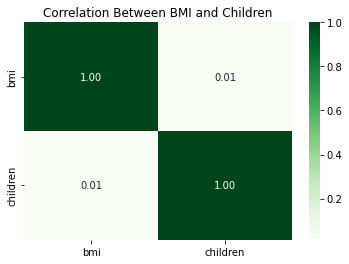

In [58]:
correlation = data[['bmi', 'children']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Greens')
plt.title('Correlation Between BMI and Children')

SONUC yazamadım.

## “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

In [60]:
bmi_i=data.bmi
outliers=[]
def detect_outlier(bmi_i):
    
    threshold=3
    mean_1 = np.mean(bmi_i)
    std_1 =np.std(bmi_i)
    
    
    for y in bmi_i:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [61]:
outlier_datapoints = detect_outlier(bmi_i)
print(outlier_datapoints)

[49.06, 50.38, 52.58, 53.13]


In [63]:
print(np.where(data['bmi']>49))

(array([ 116,  847, 1047, 1317]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


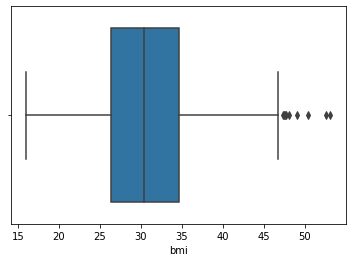

In [65]:
sns.boxplot(data['bmi'])

"BMI" değişkeni incelendiğinde yukarıdaki grafiğe gör;, 49'un üzerindeki değerlerin aykırı değerler olarak hareket ettiğini açıkça görebiliriz. 49 üzeri outlier (aykırı değerleri) var. Aykırı Değer Endeksi: 116, 847, 1047 ve 1317 indexteki outlier'dir.

In [69]:
data.drop(['age_category', "weight_condition"], axis =1, inplace = True)

## Relation Between BMI and Charges

In [71]:
mean_charges_by_bmi = data.groupby(pd.cut(data['bmi'],
             bins = [15, 18, 25, 30, 35, 55]))['charges'].mean()
print(mean_charges_by_bmi)

bmi
(15, 18]     7576.420217
(18, 25]    10459.367815
(25, 30]    10997.803881
(30, 35]    14429.421062
(35, 55]    16953.823618
Name: charges, dtype: float64


Text(0.5, 1.0, 'Medical Cost by BMI')

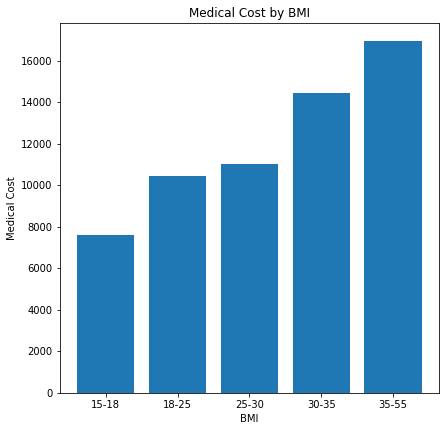

In [72]:
plt.figure(figsize=(6.8, 6.8))
plt.bar(labels, mean_charges_by_bmi.values)
plt.xlabel("BMI")
plt.ylabel("Medical Cost")
plt.title("Medical Cost by BMI")

The chart shows us the there is a positive correlation between BMI and average medical cost.

## Relation Between Region, Smoker and BMI

In [73]:
region_smoker_count = data.loc[data.smoker == 'yes']
region_smoker_count = region_smoker_count.groupby(region_smoker_count['region'])['bmi'].mean()

region_non_smoker_count = data.loc[data.smoker == 'no']
region_non_smoker_count = region_non_smoker_count.groupby(region_non_smoker_count['region'])['bmi'].mean()

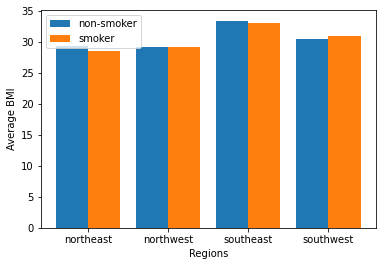

In [74]:
x_axis = np.arange(len(region_smoker_count.index))


plt.bar(x_axis -0.2, region_non_smoker_count.values, width=0.4, label = 'non-smoker')
plt.bar(x_axis +0.2, region_smoker_count.values, width=0.4, label = 'smoker')

plt.xticks(x_axis, region_smoker_count.index)

plt.xlabel("Regions")
plt.ylabel("Average BMI")

plt.legend()

plt.show()

The graph shows us region has no correlation with BMI and smoking habit. But people in southeast have more BMI exceptionally.

## Data Preprocessing

In [75]:
encoder = LabelEncoder()

In [76]:
X = data

In [77]:
X['sex'] = encoder.fit_transform(X['sex'])
X['smoker'] = encoder.fit_transform(X['smoker'])
X['region'] = encoder.fit_transform(X['region'])

In [78]:
corr = X.corr()

In [79]:
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [80]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [81]:
X = X.drop_duplicates()

In [82]:
y = X.loc[:, 'charges']
X = X.drop(['charges'], axis=1)

In [83]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [84]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Selection

In [86]:
parameter_grid = {
                 'max_depth' : [4,6,8,10],
                 'n_estimators': [100,50,10],
                 'min_samples_split': [2,3,10],
                 'min_samples_leaf': [2,3,10],
                 'bootstrap': [True, False]
}
forest = RandomForestRegressor()

grid_search = RandomizedSearchCV(forest, scoring='r2', param_distributions=parameter_grid, verbose=1, random_state=42)

grid_search.fit(X_train, y_train)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.8526523287756408
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 4, 'bootstrap': True}


In [87]:
regressor = RandomForestRegressor(**parameters, random_state = 42, oob_score=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=10,
                      oob_score=True, random_state=42)

In [88]:
pred = regressor.predict(X_test)

In [89]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [90]:
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse, '\n')

r2_score = r2_score(y_test, y_pred)
print('R2 score:', r2_score, '\n')

mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

MSE: 38548802.393518835 

R2 score: 0.7733763084200891 

MAPE: 0.4015103038619932
